# Host - microbiota Interactions Analysis

## Salmo salar mucosal tissue microbiota across functional feed treatments

#### Load libraries

In [1]:
library('tidyverse')
library('vegan')
library('ade4')
library('dendextend')
library('grid')
library('ggpubr')
library('phyloseq')

Warning message:
“package ‘tidyverse’ was built under R version 4.0.2”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.1.1     ✔ forcats 0.5.1

Warning message:
“package ‘ggplot2’ was built under R version 4.0.2”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘readr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
Warning message:
“package ‘stringr’ was built under R version 4.0.2”
Warning message:
“package ‘forcats’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘vegan’ was built under R version 4.0.2”
Loading required package: permute

Loading required package: lattic

### Read in the data - qPCR data, UniFrac, PICRUSt2 KO and MetaCyc

In [2]:
innateMan <- readRDS('/Users/jakebledsoe/Desktop/NCWMAC\ Projects/Functional\ Feed\ Study/qPCR/Innate_ManhattanDist.RDS')
adaptMan <- readRDS('/Users/jakebledsoe/Desktop/NCWMAC Projects/Functional Feed Study/qPCR/Adaptive_ManhattanDist.RDS')

wUniFrac <- readRDS('/Users/jakebledsoe/Desktop/NCWMAC\ Projects/Functional\ Feed\ Study/MicroAnalysis/NCWMAC_Micro/fish_weightedUniFrac_Dist.RDS')
uwUniFrac <- readRDS('/Users/jakebledsoe/Desktop/NCWMAC\ Projects/Functional\ Feed\ Study/MicroAnalysis/NCWMAC_Micro/fish_unweightedUniFrac_Dist.RDS')

### Ordinate - MDS/PCoA on micro dist data, and RDA/PCA on function/pathway data

In [3]:
addw <- !(is.euclid(wUniFrac))
pcoa.wUniFull <- cmdscale(wUniFrac, k = nrow(as.matrix(wUniFrac))-1, eig = TRUE, add = addw)
adduw <- !(is.euclid(uwUniFrac))
pcoa.uwUniFull <- cmdscale(uwUniFrac, k = nrow(as.matrix(uwUniFrac))-1, eig = TRUE, add = adduw)

### Make the style of GE and micro row names match

In [4]:
innateNameDF <- data.frame(OrigName = row.names(as.matrix(innateMan)))
innateNameDF <- bind_cols(innateNameDF, tidyr::separate(innateNameDF, OrigName, c('Tissue', 'Tank', 'Fish'), '_'))
innateNameDF$NewName <- paste0(innateNameDF$Tank,
                              '_',
                              innateNameDF$Fish,
                              '_',
                              innateNameDF$Tissue)
innateNameDF$NewName

innateMan1 <- as.matrix(innateMan)
colnames(innateMan1) <- innateNameDF$NewName[match(colnames(innateMan1), innateNameDF$OrigName)]
rownames(innateMan1) <- innateNameDF$NewName[match(rownames(innateMan1), innateNameDF$OrigName)]
innateMan1 <- as.matrix(innateMan1)
head(innateMan1)

[1] "T10_F1_Gut"  "T18_F2_Gut"  "T10_F2_Gut"  "T18_F3_Gut"  "T10_F3_Gut" 
  [6] "T17_F1_Gut"  "T17_F2_Gut"  "T17_F3_Gut"  "T18_F1_Gut"  "T14_F3_Gut" 
 [11] "T16_F1_Gut"  "T16_F2_Gut"  "T16_F3_Gut"  "T20_F1_Gut"  "T14_F1_Gut" 
 [16] "T20_F2_Gut"  "T14_F2_Gut"  "T20_F3_Gut"  "T21_F1_Gut"  "T21_F2_Gut" 
 [21] "T19_F1_Gut"  "T21_F3_Gut"  "T13_F1_Gut"  "T19_F2_Gut"  "T13_F2_Gut" 
 [26] "T19_F3_Gut"  "T13_F3_Gut"  "T23_F3_Gut"  "T24_F2_Gut"  "T22_F1_Gut" 
 [31] "T24_F3_Gut"  "T22_F2_Gut"  "T22_F3_Gut"  "T23_F1_Gut"  "T23_F2_Gut" 
 [36] "T10_F1_Gill" "T18_F2_Gill" "T10_F2_Gill" "T18_F3_Gill" "T10_F3_Gill"
 [41] "T17_F1_Gill" "T17_F2_Gill" "T17_F3_Gill" "T18_F1_Gill" "T14_F3_Gill"
 [46] "T16_F1_Gill" "T16_F2_Gill" "T16_F3_Gill" "T20_F1_Gill" "T14_F1_Gill"
 [51] "T20_F2_Gill" "T14_F2_Gill" "T20_F3_Gill" "T21_F1_Gill" "T21_F2_Gill"
 [56] "T19_F1_Gill" "T21_F3_Gill" "T13_F1_Gill" "T19_F2_Gill" "T13_F2_Gill"
 [61] "T19_F3_Gill" "T13_F3_Gill" "T23_F3_Gill" "T24_F1_Gill" "T24_F2_Gill"
 [66] "T22_F1_Gill" "T24_F3_Gill" "T22_F2_Gill" "T22_F3_Gill" "T23_F1_Gill"
 [71] "T23_F2_Gill" "T10_F1_Skin" "T18_F2_Skin" "T10_F2_Skin" "T18_F3_Skin"
 [76] "T17_F1_Skin" "T17_F2_Skin" "T17_F3_Skin" "T18_F1_Skin" "T14_F3_Skin"
 [81] "T16_F1_Skin" "T16_F2_Skin" "T16_F3_Skin" "T20_F1_Skin" "T14_F1_Skin"
 [86] "T20_F2_Skin" "T14_F2_Skin" "T20_F3_Skin" "T21_F1_Skin" "T21_F2_Skin"
 [91] "T19_F1_Skin" "T21_F3_Skin" "T13_F1_Skin" "T19_F2_Skin" "T13_F2_Skin"
 [96] "T19_F3_Skin" "T13_F3_Skin" "T23_F3_Skin" "T24_F1_Skin" "T24_F2_Skin"
[101] "T24_F3_Skin" "T22_F2_Skin" "T22_F3_Skin" "T23_F1_Skin" "T23_F2_Skin"

,T10_F1_Gut,T18_F2_Gut,T10_F2_Gut,T18_F3_Gut,T10_F3_Gut,T17_F1_Gut,T17_F2_Gut,T17_F3_Gut,T18_F1_Gut,T14_F3_Gut,⋯,T19_F3_Skin,T13_F3_Skin,T23_F3_Skin,T24_F1_Skin,T24_F2_Skin,T24_F3_Skin,T22_F2_Skin,T22_F3_Skin,T23_F1_Skin,T23_F2_Skin
T10_F1_Gut,0.000000,5.591507,8.333035,6.151715,8.877981,8.252441,10.550998,5.849693,15.65829,8.67359,⋯,30.30757,28.22147,31.60807,31.78952,31.33267,31.07468,27.38269,28.46770,30.80629,31.22000
T18_F2_Gut,5.591507,0.000000,13.732515,8.884286,13.657339,10.691875,14.469711,9.537051,21.14958,11.60949,⋯,34.36546,32.27936,35.66596,35.84741,35.39055,35.13256,31.44058,32.52558,34.86417,35.27788
T10_F2_Gut,8.333035,13.732515,0.000000,7.906760,7.152642,9.469389,11.443254,8.380148,10.11267,11.28721,⋯,29.10024,27.20332,27.44460,27.62605,27.16920,26.91121,26.13676,27.56415,29.56100,30.89401
T18_F3_Gut,6.151715,8.884286,7.906760,0.000000,5.883145,4.125055,6.958379,7.902399,15.82908,11.62853,⋯,29.84249,27.94557,29.00638,29.18783,28.73098,28.47299,26.87901,28.30641,30.30325,31.63626
T10_F3_Gut,8.877981,13.657339,7.152642,5.883145,0.000000,4.300701,5.823690,9.725947,13.20885,15.28713,⋯,25.22863,23.33171,25.16038,25.34182,24.88497,24.62698,22.26515,23.69255,25.68939,27.02240
T17_F1_Gut,8.252441,10.691875,9.469389,4.125055,4.300701,0.000000,4.880388,8.637168,17.01255,13.05769,⋯,28.58336,26.68644,28.75166,28.93310,28.47625,28.21826,25.61988,27.04727,29.04412,30.37713


In [5]:
adaptNameDF <- data.frame(OrigName = row.names(as.matrix(adaptMan)))
adaptNameDF <- bind_cols(adaptNameDF, tidyr::separate(adaptNameDF, OrigName, c('Tissue', 'Tank', 'Fish'), '_'))
adaptNameDF$NewName <- paste0(adaptNameDF$Tank,
                              '_',
                              adaptNameDF$Fish,
                              '_',
                              adaptNameDF$Tissue)
adaptNameDF$NewName

adaptMan1 <- as.matrix(adaptMan)
colnames(adaptMan1) <- adaptNameDF$NewName[match(colnames(adaptMan1), adaptNameDF$OrigName)]
rownames(adaptMan1) <- adaptNameDF$NewName[match(rownames(adaptMan1), adaptNameDF$OrigName)]
adaptMan1 <- as.matrix(adaptMan1)
head(adaptMan1)

[1] "T10_F1_Gut"  "T18_F2_Gut"  "T10_F2_Gut"  "T18_F3_Gut"  "T10_F3_Gut" 
  [6] "T17_F1_Gut"  "T17_F2_Gut"  "T17_F3_Gut"  "T18_F1_Gut"  "T14_F3_Gut" 
 [11] "T16_F1_Gut"  "T16_F2_Gut"  "T16_F3_Gut"  "T20_F1_Gut"  "T14_F1_Gut" 
 [16] "T20_F2_Gut"  "T14_F2_Gut"  "T20_F3_Gut"  "T21_F1_Gut"  "T21_F2_Gut" 
 [21] "T19_F1_Gut"  "T21_F3_Gut"  "T13_F1_Gut"  "T19_F2_Gut"  "T13_F2_Gut" 
 [26] "T19_F3_Gut"  "T13_F3_Gut"  "T23_F3_Gut"  "T24_F2_Gut"  "T22_F1_Gut" 
 [31] "T24_F3_Gut"  "T22_F2_Gut"  "T22_F3_Gut"  "T23_F1_Gut"  "T23_F2_Gut" 
 [36] "T10_F1_Gill" "T18_F2_Gill" "T10_F2_Gill" "T18_F3_Gill" "T10_F3_Gill"
 [41] "T17_F1_Gill" "T17_F2_Gill" "T17_F3_Gill" "T18_F1_Gill" "T14_F3_Gill"
 [46] "T16_F1_Gill" "T16_F2_Gill" "T16_F3_Gill" "T20_F1_Gill" "T14_F1_Gill"
 [51] "T20_F2_Gill" "T14_F2_Gill" "T20_F3_Gill" "T21_F1_Gill" "T21_F2_Gill"
 [56] "T19_F1_Gill" "T21_F3_Gill" "T13_F1_Gill" "T19_F2_Gill" "T13_F2_Gill"
 [61] "T19_F3_Gill" "T13_F3_Gill" "T23_F3_Gill" "T24_F1_Gill" "T24_F2_Gill"
 [66] "T22_F1_Gill" "T24_F3_Gill" "T22_F2_Gill" "T22_F3_Gill" "T23_F1_Gill"
 [71] "T23_F2_Gill" "T18_F2_PBL"  "T10_F2_PBL"  "T18_F3_PBL"  "T10_F3_PBL" 
 [76] "T17_F1_PBL"  "T17_F2_PBL"  "T17_F3_PBL"  "T18_F1_PBL"  "T14_F3_PBL" 
 [81] "T16_F1_PBL"  "T16_F2_PBL"  "T16_F3_PBL"  "T20_F1_PBL"  "T14_F1_PBL" 
 [86] "T20_F2_PBL"  "T14_F2_PBL"  "T20_F3_PBL"  "T21_F1_PBL"  "T21_F2_PBL" 
 [91] "T19_F1_PBL"  "T21_F3_PBL"  "T13_F1_PBL"  "T19_F2_PBL"  "T19_F3_PBL" 
 [96] "T13_F3_PBL"  "T23_F3_PBL"  "T24_F1_PBL"  "T24_F2_PBL"  "T22_F1_PBL" 
[101] "T24_F3_PBL"  "T22_F2_PBL"  "T22_F3_PBL"  "T23_F1_PBL"  "T23_F2_PBL" 
[106] "T10_F1_Skin" "T18_F2_Skin" "T10_F2_Skin" "T18_F3_Skin" "T17_F1_Skin"
[111] "T17_F2_Skin" "T17_F3_Skin" "T18_F1_Skin" "T14_F3_Skin" "T16_F1_Skin"
[116] "T16_F2_Skin" "T16_F3_Skin" "T20_F1_Skin" "T14_F1_Skin" "T20_F2_Skin"
[121] "T14_F2_Skin" "T20_F3_Skin" "T21_F1_Skin" "T21_F2_Skin" "T19_F1_Skin"
[126] "T21_F3_Skin" "T13_F1_Skin" "T19_F2_Skin" "T13_F2_Skin" "T19_F3_Skin"
[131] "T13_F3_Skin" "T23_F3_Skin" "T24_F1_Skin" "T24_F2_Skin" "T24_F3_Skin"
[136] "T22_F2_Skin" "T22_F3_Skin" "T23_F1_Skin" "T23_F2_Skin" "T10_F1_PBL"

,T10_F1_Gut,T18_F2_Gut,T10_F2_Gut,T18_F3_Gut,T10_F3_Gut,T17_F1_Gut,T17_F2_Gut,T17_F3_Gut,T18_F1_Gut,T14_F3_Gut,⋯,T13_F3_Skin,T23_F3_Skin,T24_F1_Skin,T24_F2_Skin,T24_F3_Skin,T22_F2_Skin,T22_F3_Skin,T23_F1_Skin,T23_F2_Skin,T10_F1_PBL
T10_F1_Gut,0.000000,7.317572,6.614173,4.434893,3.684577,4.076629,7.953613,3.819739,9.764706,3.119700,⋯,18.41791,12.51614,16.18484,12.67330,13.26306,12.93242,19.25715,16.39059,13.91672,14.529413
T18_F2_Gut,7.317572,0.000000,6.122381,5.614563,6.918267,7.402129,6.697415,6.584060,8.902038,5.769399,⋯,21.93195,18.67634,20.36172,18.32323,19.66869,18.18308,21.06737,19.93168,19.44063,9.994002
T10_F2_Gut,6.614173,6.122381,0.000000,3.743570,4.883990,7.558958,4.013728,4.988046,5.719368,5.581955,⋯,16.14240,15.14499,14.23934,12.96304,18.65897,14.03508,15.16921,13.80930,13.96783,12.954490
T18_F3_Gut,4.434893,5.614563,3.743570,0.000000,2.915438,4.400359,4.133853,2.673394,6.573934,3.264945,⋯,16.84082,13.10718,14.79256,12.75407,15.56913,12.95181,16.43539,14.39449,13.93612,11.325423
T10_F3_Gut,3.684577,6.918267,4.883990,2.915438,0.000000,4.370517,4.842951,2.758121,7.581363,3.689794,⋯,15.23386,11.75807,13.91486,11.40496,13.83397,11.28990,16.07310,13.48737,12.52237,12.486642
T17_F1_Gut,4.076629,7.402129,7.558958,4.400359,4.370517,0.000000,7.438497,3.344672,10.142018,3.732615,⋯,18.90079,14.64596,17.74906,14.29285,14.78908,14.15271,19.74003,17.32157,15.41026,14.906031


In [6]:
wUniFracMat <- as.matrix(wUniFrac)
head(wUniFracMat)
uwUniFracMat <- as.matrix(uwUniFrac)
head(uwUniFracMat)

,T1_F1_Gill,T1_F1_Gut,T1_F1_Skin,T1_F2_Gill,T1_F2_Gut,T1_F2_Skin,T1_F3_Gill,T1_F3_Gut,T1_F3_Skin,T10_F1_Gill,⋯,T8_F2_Skin,T8_F3_Skin,T9_F1_Gill,T9_F1_Gut,T9_F1_Skin,T9_F2_Gill,T9_F2_Gut,T9_F2_Skin,T9_F3_Gill,T9_F3_Skin
T1_F1_Gill,0.0000000,0.7113914,0.3541968,0.3582785,0.5545640,0.5751363,0.3107022,0.9430213,0.3267998,0.3457982,⋯,0.3735535,0.3549265,0.3058580,0.7275243,0.4544017,0.2372656,0.5730438,0.3774668,0.4146882,0.4040473
T1_F1_Gut,0.7113914,0.0000000,0.7049051,0.6559080,0.5549310,0.7787596,0.6982787,0.7591374,0.6559712,0.6461658,⋯,0.6964653,0.6496856,0.6680486,0.3667498,0.6980348,0.6745372,0.5005015,0.7114861,0.5791271,0.7324036
T1_F1_Skin,0.3541968,0.7049051,0.0000000,0.3052076,0.5839760,0.5400621,0.3180695,0.9423322,0.2554049,0.3225455,⋯,0.3032774,0.3225391,0.3042025,0.7097552,0.2983615,0.3197318,0.5701988,0.2458082,0.3838270,0.2765058
T1_F2_Gill,0.3582785,0.6559080,0.3052076,0.0000000,0.5505535,0.4581333,0.2711215,0.9182264,0.2208102,0.2667234,⋯,0.2816871,0.3348506,0.2319297,0.6448532,0.3895989,0.3020460,0.5139600,0.3453751,0.3209548,0.3697617
T1_F2_Gut,0.5545640,0.5549310,0.5839760,0.5505535,0.0000000,0.7229501,0.5895715,0.8997191,0.5450920,0.5385739,⋯,0.5765349,0.4922262,0.5597803,0.6082525,0.5857566,0.5578572,0.4194220,0.5731436,0.4440361,0.6025667
T1_F2_Skin,0.5751363,0.7787596,0.5400621,0.4581333,0.7229501,0.0000000,0.5268982,0.9409745,0.5174604,0.5146102,⋯,0.5206756,0.5650958,0.4944752,0.7724026,0.5541262,0.5171938,0.6904808,0.5452315,0.5624206,0.5567572


,T1_F1_Gill,T1_F1_Gut,T1_F1_Skin,T1_F2_Gill,T1_F2_Gut,T1_F2_Skin,T1_F3_Gill,T1_F3_Gut,T1_F3_Skin,T10_F1_Gill,⋯,T8_F2_Skin,T8_F3_Skin,T9_F1_Gill,T9_F1_Gut,T9_F1_Skin,T9_F2_Gill,T9_F2_Gut,T9_F2_Skin,T9_F3_Gill,T9_F3_Skin
T1_F1_Gill,0.0000000,0.8476948,0.6853122,0.5851677,0.8860419,0.6216477,0.5702832,0.9379290,0.6422427,0.6082071,⋯,0.6442004,0.6996818,0.6052907,0.8114053,0.7462678,0.6579245,0.7827499,0.7196560,0.7164841,0.6596906
T1_F1_Gut,0.8476948,0.0000000,0.8323922,0.8576764,0.6573736,0.8622004,0.8152566,0.8121154,0.8298944,0.8769560,⋯,0.8823453,0.7755927,0.8004922,0.6555017,0.8468356,0.8308036,0.6718411,0.8344273,0.7445480,0.8306213
T1_F1_Skin,0.6853122,0.8323922,0.0000000,0.6591549,0.8729921,0.6612168,0.6492192,0.9397733,0.5892532,0.6435078,⋯,0.5956645,0.7014195,0.6104286,0.8531007,0.6571831,0.6281409,0.7692826,0.6356736,0.6939064,0.6008577
T1_F2_Gill,0.5851677,0.8576764,0.6591549,0.0000000,0.8854640,0.6409117,0.5877302,0.9294237,0.6213691,0.5680828,⋯,0.5850654,0.7116367,0.6064602,0.8528319,0.7095975,0.6210710,0.8005867,0.6944463,0.7023144,0.6440456
T1_F2_Gut,0.8860419,0.6573736,0.8729921,0.8854640,0.0000000,0.9117646,0.8654230,0.8412792,0.8263605,0.8941896,⋯,0.9075845,0.8390690,0.8610948,0.6501064,0.8849837,0.8642522,0.7161129,0.8575055,0.7829982,0.8434487
T1_F2_Skin,0.6216477,0.8622004,0.6612168,0.6409117,0.9117646,0.0000000,0.6318106,0.9621502,0.6276269,0.6138929,⋯,0.6207845,0.7095485,0.6697292,0.8780974,0.6991548,0.6245557,0.8360151,0.7036784,0.7534543,0.6781886


#### Filter and sort data to ensure sample matched data for qPCR and microbiota results - 102 samples - 35 gill, 33 gut, 34 skin

In [7]:
sampKeep <- rownames(wUniFracMat) %in% innateNameDF$NewName

wUniFracMatFinal <- wUniFracMat[sampKeep,sampKeep]
uwUniFracMatFinal <- uwUniFracMat[sampKeep,sampKeep]

sampKeep2 <- rownames(innateMan1) %in% rownames(wUniFracMat)
innateManMatFinal <- innateMan1[sampKeep2,sampKeep2]

sampKeep3 <- rownames(adaptMan1) %in% rownames(wUniFracMat)
adaptManMatFinal <- adaptMan1[sampKeep3,sampKeep3]

dim(wUniFracMatFinal)
dim(uwUniFracMatFinal)
dim(innateManMatFinal)
dim(adaptManMatFinal)

[1] 102 102

[1] 102 102

[1] 102 102

[1] 102 102

In [8]:
sortUniFrac <- sort_dist_mat(as.dist(wUniFracMatFinal),  by_rows = TRUE, by_cols = TRUE)
sortuwUniFrac <- sort_dist_mat(as.dist(uwUniFracMatFinal),  by_rows = TRUE, by_cols = TRUE)
sortInnateMan <- sort_dist_mat(as.dist(innateManMatFinal), by_rows = TRUE, by_cols = TRUE)
sortAdaptMan <- sort_dist_mat(as.dist(adaptManMatFinal), by_rows = TRUE, by_cols = TRUE)

### Run MDS on the dist matrices and plot

In [9]:
set.seed(123)
add <-  !(is.euclid(sortUniFrac))
pcoa.wUni <- cmdscale(sortUniFrac, k = nrow(as.matrix(sortUniFrac))-1, eig = TRUE, add = add)

adduw <-  !(is.euclid(sortuwUniFrac))
pcoa.uwUni <- cmdscale(sortuwUniFrac, k = nrow(as.matrix(sortuwUniFrac))-1, eig = TRUE, add = adduw)

addInnate <-  !(is.euclid(sortInnateMan))
pcoa.Innate.Man <- cmdscale(sortInnateMan, k = nrow(as.matrix(sortInnateMan))-1, eig = TRUE, add = addInnate)

addAdapt <-  !(is.euclid(sortAdaptMan))
pcoa.Adapt.Man <- cmdscale(sortAdaptMan, k = nrow(as.matrix(sortAdaptMan))-1, eig = TRUE, add = addAdapt)

#ordiplot(pcoa.wUni, type = "text", main = "wUniFrac PCoA for ASV Data")
#ordiplot(pcoa.uwUni, type = "text", main = "uwUniFrac PCoA for ASV Data")
#ordiplot(pcoa.Man, type = "text", main = "PCoA for GE Data")

### Run procrustes analysis

In [10]:
set.seed(123)
procrustes(pcoa.wUni, pcoa.Innate.Man, symmetric = TRUE, permutations=999)
pro_wUniInnate <- protest(pcoa.wUni, pcoa.Innate.Man, symmetric = TRUE, permutations=999)

procrustes(pcoa.uwUni, pcoa.Innate.Man, symmetric = TRUE, permutations=999)
pro_uwUniInnate <- protest(pcoa.uwUni, pcoa.Innate.Man, symmetric = TRUE, permutations=999)

procrustes(pcoa.wUni, pcoa.Adapt.Man, symmetric = TRUE, permutations=999)
pro_wUniAdapt <- protest(pcoa.wUni, pcoa.Adapt.Man, symmetric = TRUE, permutations=999)

procrustes(pcoa.uwUni, pcoa.Adapt.Man,symmetric = TRUE, permutations=999)
pro_uwUniAdapt <- protest(pcoa.uwUni, pcoa.Adapt.Man, symmetric = TRUE, permutations=999)


Call:
procrustes(X = pcoa.wUni, Y = pcoa.Innate.Man, symmetric = TRUE,      permutations = 999) 

Procrustes sum of squares:
0.3833 



Call:
procrustes(X = pcoa.uwUni, Y = pcoa.Innate.Man, symmetric = TRUE,      permutations = 999) 

Procrustes sum of squares:
0.2709 



Call:
procrustes(X = pcoa.wUni, Y = pcoa.Adapt.Man, symmetric = TRUE,      permutations = 999) 

Procrustes sum of squares:
0.4237 



Call:
procrustes(X = pcoa.uwUni, Y = pcoa.Adapt.Man, symmetric = TRUE,      permutations = 999) 

Procrustes sum of squares:
0.2856 


### Plot with ggplot

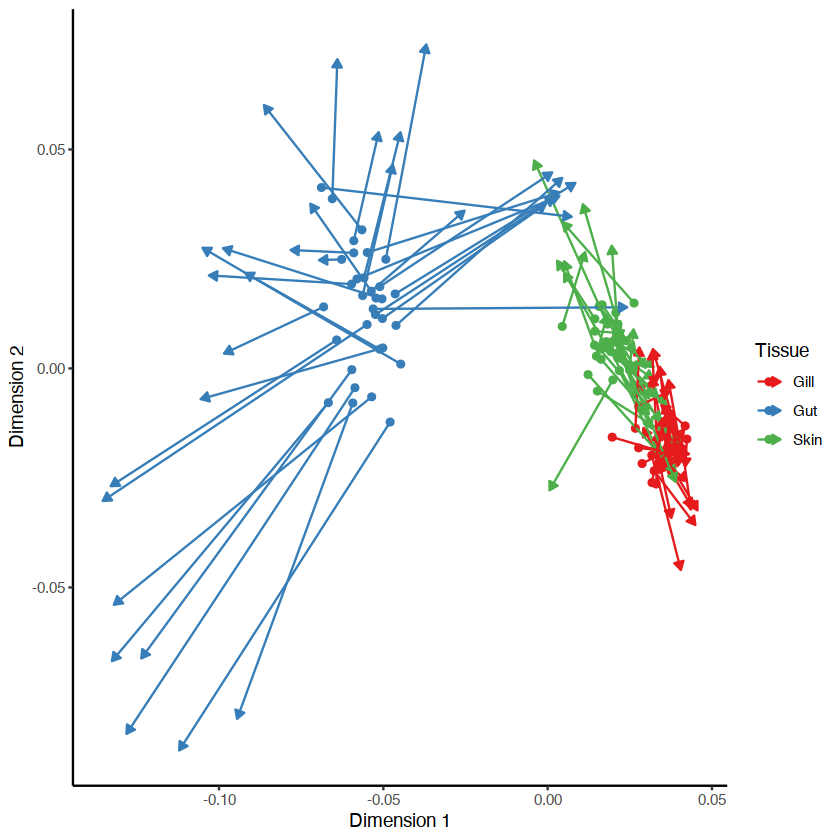

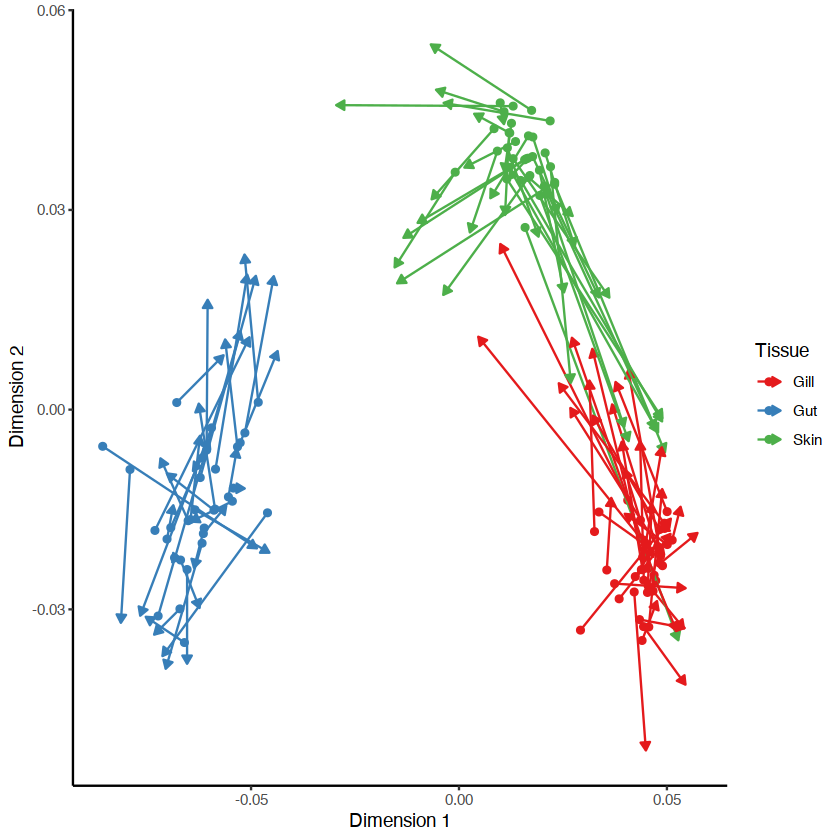

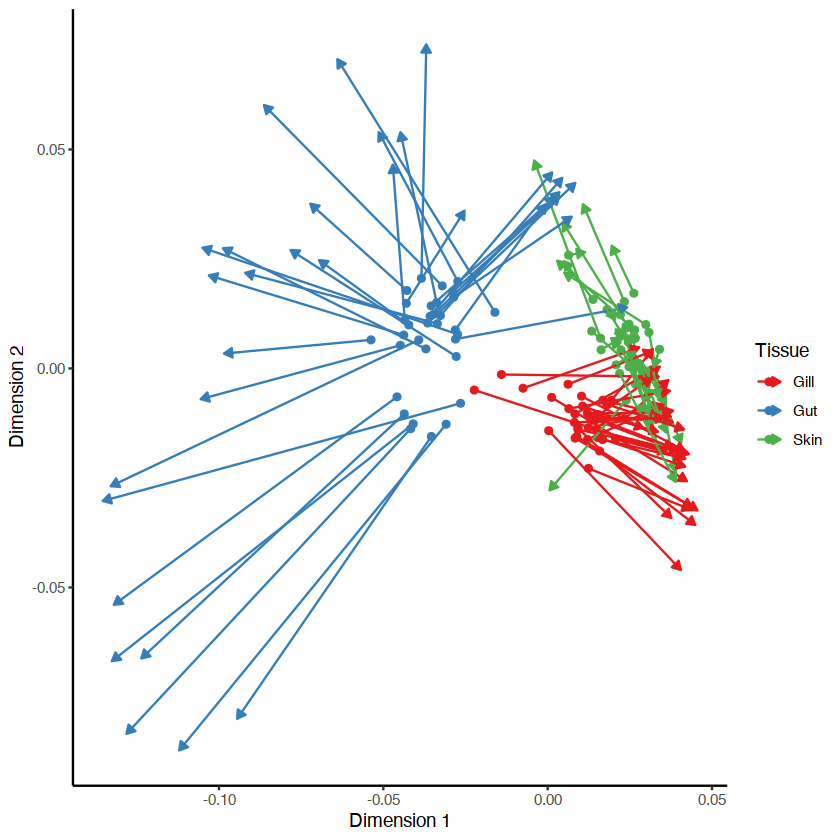

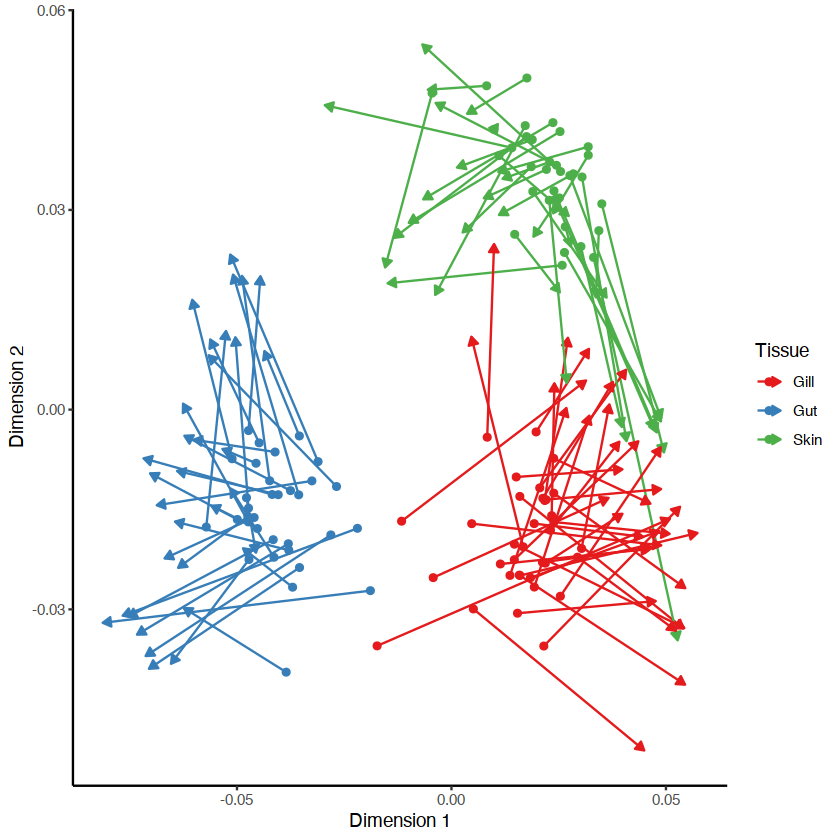

In [11]:
sampLabels <- strsplit(row.names(pcoa.wUni$points), "_") %>% 
                as.data.frame() %>% 
                t %>% 
                data.frame(stringsAsFactors = F) %>% 
                pull(3) 

wInnateDF <- data.frame(rda1=pro_wUniInnate$Yrot[,1],
                        rda2=pro_wUniInnate$Yrot[,2],
                        xrda1=pro_wUniInnate$X[,1],
                        xrda2=pro_wUniInnate$X[,2],
                        Tissue=sampLabels)



wInnatePro <- ggplot(wInnateDF
                    ) + geom_point(aes(x=rda1,
                                       y=rda2,
                                       colour=Tissue)
                                  ) + geom_segment(aes(x=rda1,
                                                       y=rda2,
                                                       xend=xrda1,
                                                       yend=xrda2,
                                                       colour=Tissue),
                                                   arrow=arrow(length=unit(0.2,"cm"), type="closed")
                                                   ) + xlab('Dimension 1'
                                                           ) + ylab('Dimension 2'
                                                                   ) +scale_color_brewer(palette="Set1"
                                                                                        ) + theme_classic()
wInnatePro



uwInnateDF <- data.frame(rda1=pro_uwUniInnate $Yrot[,1],
                     rda2=pro_uwUniInnate $Yrot[,2],
                     xrda1=pro_uwUniInnate $X[,1],
                     xrda2=pro_uwUniInnate $X[,2],
                     Tissue=sampLabels)

uwInnatePro <- ggplot(uwInnateDF
                     ) + geom_point(aes(x=rda1,
                                        y=rda2,
                                        colour=Tissue)
                                   ) + geom_segment(aes(x=rda1,
                                                        y=rda2,
                                                        xend=xrda1,
                                                        yend=xrda2,
                                                        colour=Tissue),
                                                    arrow=arrow(length=unit(0.2,"cm"), type="closed")
                                                   ) + xlab('Dimension 1'
                                                           ) + ylab('Dimension 2'
                                                                   ) +scale_color_brewer(palette="Set1"
                                                                                        ) + theme_classic()
uwInnatePro
wAdaptDF <- data.frame(rda1=pro_wUniAdapt$Yrot[,1],
                       rda2=pro_wUniAdapt$Yrot[,2],
                       xrda1=pro_wUniAdapt$X[,1],
                       xrda2=pro_wUniAdapt$X[,2],
                       Tissue=sampLabels)

wAdaptPro <- ggplot(wAdaptDF
                    ) + geom_point(aes(x=rda1,
                                       y=rda2,
                                       colour=Tissue)
                                  ) + geom_segment(aes(x=rda1,
                                                       y=rda2,
                                                       xend=xrda1,
                                                       yend=xrda2,
                                                       colour=Tissue),
                                                   arrow=arrow(length=unit(0.2,"cm"), type="closed")
                                                   ) + xlab('Dimension 1'
                                                           ) + ylab('Dimension 2'
                                                                   ) +scale_color_brewer(palette="Set1"
                                                                                        ) + theme_classic()
wAdaptPro


uwAdaptDF <- data.frame(rda1=pro_uwUniAdapt $Yrot[,1],
                        rda2=pro_uwUniAdapt $Yrot[,2],
                        xrda1=pro_uwUniAdapt $X[,1],
                        xrda2=pro_uwUniAdapt $X[,2],
                        Tissue=sampLabels)

uwAdaptPro <- ggplot(uwAdaptDF
                     ) + geom_point(aes(x=rda1,
                                        y=rda2,
                                        colour=Tissue)
                                   ) + geom_segment(aes(x=rda1,
                                                        y=rda2,
                                                        xend=xrda1,
                                                        yend=xrda2,
                                                        colour=Tissue),
                                                    arrow=arrow(length=unit(0.2,"cm"), type="closed")
                                                   ) + xlab('Dimension 1'
                                                           ) + ylab('Dimension 2'
                                                                   ) +scale_color_brewer(palette="Set1"
                                                                                        ) + theme_classic()
uwAdaptPro

In [12]:
proPlotter <- function(Proc) {
    x <- data.frame(Residuals = residuals(Proc)) %>% rownames_to_column('SampleID'
                                                                                 ) %>% tidyr::separate(SampleID, c('Tank', 'Fish', 'Tissue'), '_', remove=FALSE
                                                                                                      ) %>% mutate_at(vars('SampleID', 'Tank', 'Fish', 'Tissue'), list(factor)
                                                                                                                     ) %>% arrange(Tissue, Tank)
    ggplot(x, aes(x=Tissue, y=Residuals, fill=Tissue)
          ) + geom_violin() + scale_fill_brewer(palette="Set1"
                                                                ) + ylab('Residuals'
                                                                        ) + theme_classic() + theme(legend.position = 'none',
                                                                                                    axis.title.x=element_blank())
}

In [13]:
require(ggmap)
wInnatePro1 <- wInnatePro + inset(ggplotGrob(proPlotter(pro_wUniInnate)), xmin=-0.065, xmax=0.037, ymax=-0.035, ymin=-0.095)
uwInnatePro1 <- uwInnatePro + inset(ggplotGrob(proPlotter(pro_uwUniInnate)), xmin=-0.045, xmax=0.025, ymax=-0.017, ymin=-0.057)
wAdaptPro1 <- wAdaptPro + inset(ggplotGrob(proPlotter(pro_wUniAdapt)), xmin=-0.0575, xmax=0.034, ymax=-0.041 ,ymin=-0.095)
uwAdaptPro1 <- uwAdaptPro + inset(ggplotGrob(proPlotter(pro_uwUniAdapt)), xmin=-0.091, xmax=-0.0294, ymax=0.062, ymin=0.025)

Loading required package: ggmap

Google's Terms of Service: https://cloud.google.com/maps-platform/terms/.

Please cite ggmap if you use it! See citation("ggmap") for details.



Saving 8.4 x 8.4 in image



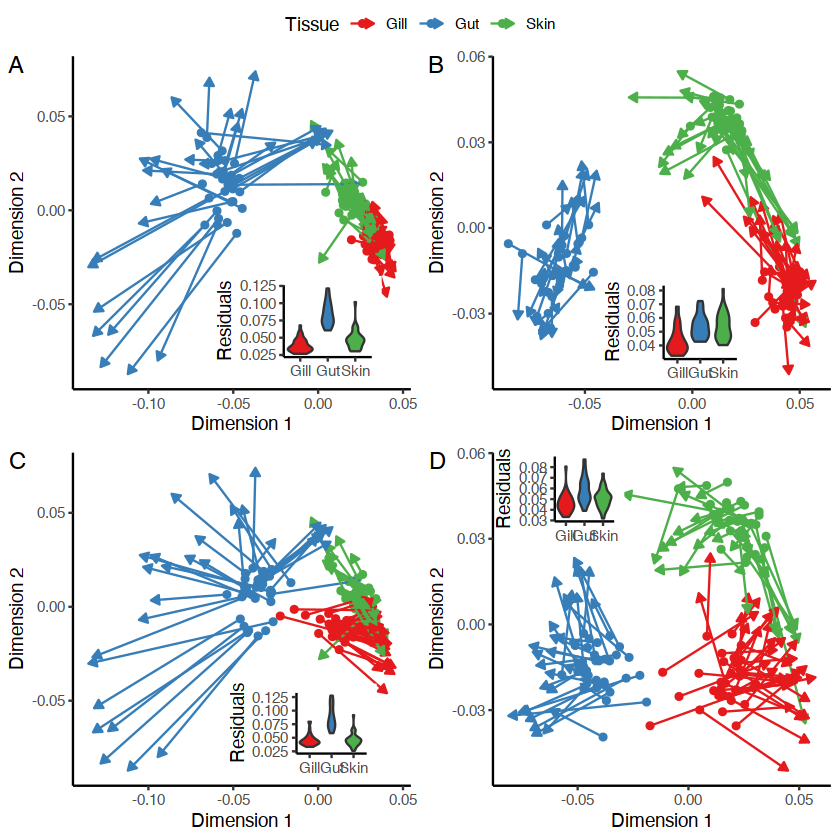

In [14]:
genePro <- ggarrange(wInnatePro1,
                     uwInnatePro1,
                     wAdaptPro1,
                     uwAdaptPro1, 
                     ncol=2,
                     nrow=2,
                     common.legend = TRUE,
                     legend='top',
                     labels="AUTO")
genePro
ggsave('Figures/Manuscript/geneProcrust.png', scale=1.2, bg='white')
saveRDS(wInnatePro, 'GeneMicroProPlotWUni.RDS')
saveRDS(uwInnatePro, 'GeneMicroProPlotuWUni.RDS')
saveRDS(wAdaptPro, 'AdaptProPlotWUni.RDS')
saveRDS(uwAdaptPro, 'AdaptProPlotuWUni.RDS')


Call:
protest(X = pcoa.wUni, Y = pcoa.Innate.Man, permutations = 999,      symmetric = TRUE) 

Procrustes Sum of Squares (m12 squared):        0.3833 
Correlation in a symmetric Procrustes rotation: 0.7853 
Significance:  0.001 

Permutation: free
Number of permutations: 999



Call:
protest(X = pcoa.uwUni, Y = pcoa.Innate.Man, permutations = 999,      symmetric = TRUE) 

Procrustes Sum of Squares (m12 squared):        0.2709 
Correlation in a symmetric Procrustes rotation: 0.8539 
Significance:  0.001 

Permutation: free
Number of permutations: 999



Call:
protest(X = pcoa.wUni, Y = pcoa.Adapt.Man, permutations = 999,      symmetric = TRUE) 

Procrustes Sum of Squares (m12 squared):        0.4237 
Correlation in a symmetric Procrustes rotation: 0.7592 
Significance:  0.001 

Permutation: free
Number of permutations: 999



Call:
protest(X = pcoa.uwUni, Y = pcoa.Adapt.Man, permutations = 999,      symmetric = TRUE) 

Procrustes Sum of Squares (m12 squared):        0.2856 
Correlation in a symmetric Procrustes rotation: 0.8452 
Significance:  0.001 

Permutation: free
Number of permutations: 999


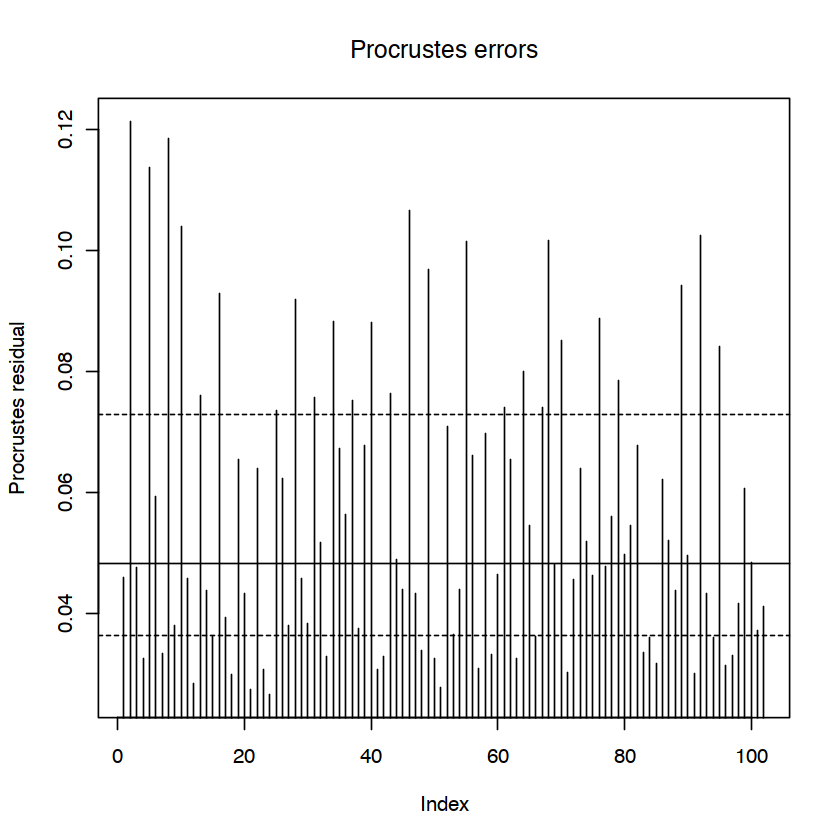

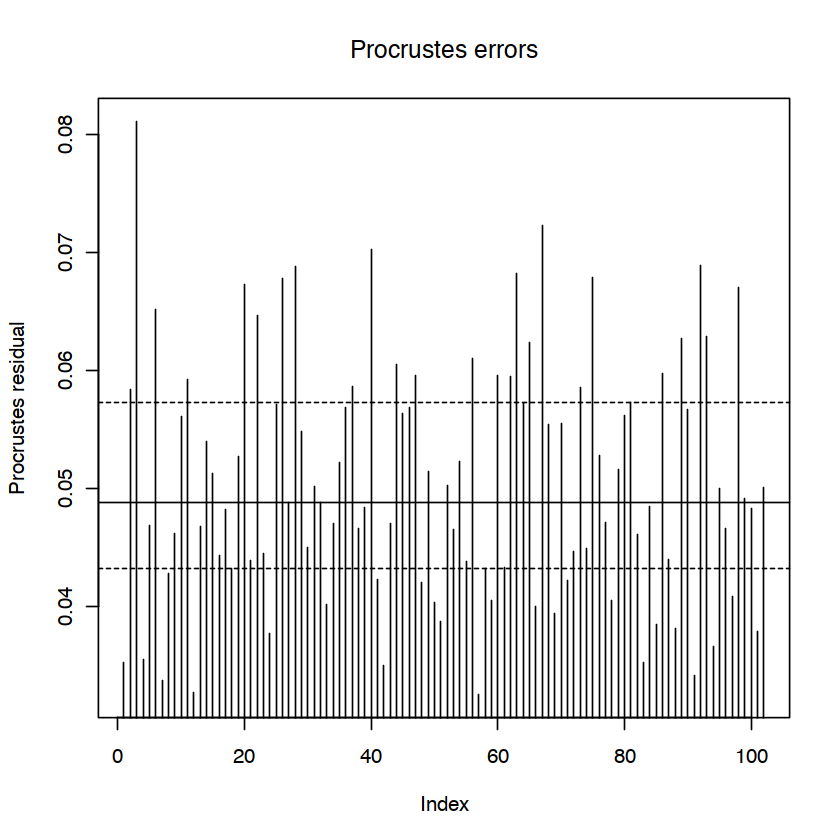

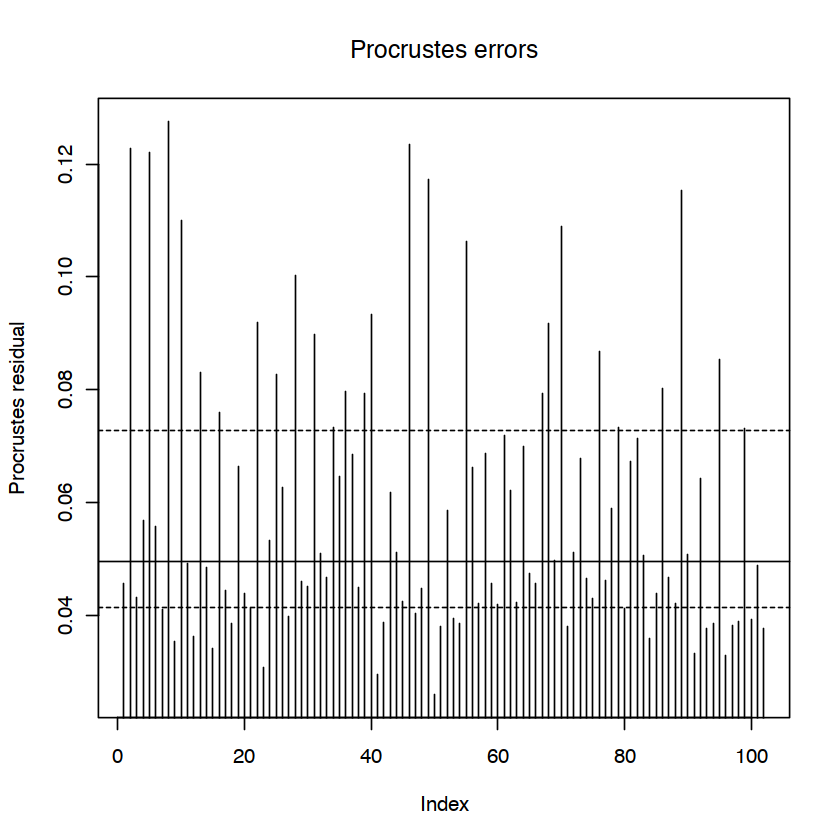

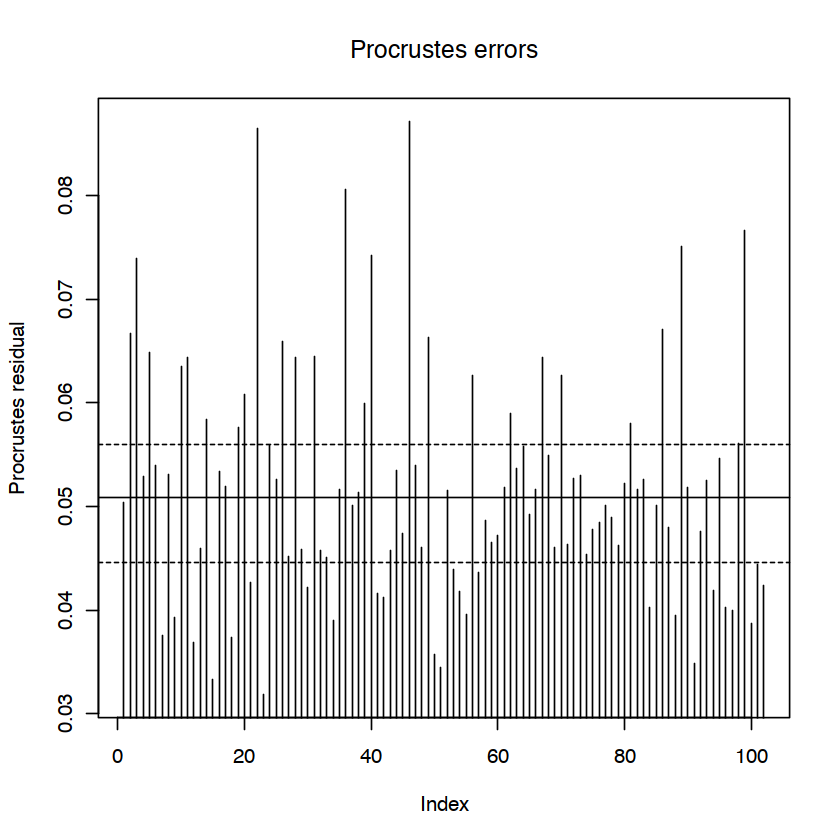

In [15]:
pro_wUniInnate

pro_uwUniInnate

pro_wUniAdapt

pro_uwUniAdapt

plot(pro_wUniInnate, kind=2)
plot(pro_uwUniInnate, kind=2)
plot(pro_wUniAdapt, kind=2)
plot(pro_uwUniAdapt, kind=2)